Valid for ping 0.28.1 (10/01/2025)

## Extract Water-Column Data

In [1]:
%matplotlib widget

import numpy as np
import themachinethatgoesping as pingmachine
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

### 1. Load data

In [2]:
# data folder
folder = r'C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD'

# list raw data files
files = pingmachine.echosounders.index_functions.find_files(folder,['.all','.wcd'])
files.sort()

# create the file handler
index_files = pingmachine.echosounders.index_functions.get_index_paths(files)
fileHandler = pingmachine.echosounders.kongsbergall.KongsbergAllFileHandler(files,index_paths=index_files)

# get pings that contain WCD
pings = pingmachine.pingprocessing.filter_pings.by_features(fileHandler.get_pings(),['watercolumn.amplitudes'])

# check data with the WCI Viewer
viewer = pingmachine.pingprocessing.widgets.WCIViewer(pings, name='WCI Viewer')

Found 8 files
indexing files ⢀ 99% :00s<00m:00s] [Found: 7463 datagrams in 8 files (258MB)]                                          
Initializing ping interface ⢀ 75% :00s<00m:00s] [Done]                                              


### 2. Extract and display water-column data

In [3]:
# Get the WCD from the first ping
wcd = pings[0].watercolumn
print(f"wcd is of type {type(wcd)}.")

#  extract data using method get_av()
av = wcd.get_av()
print(f"av is of type {type(av)}")
print(f"av is a {np.shape(av)[0]} x {np.shape(av)[1]} beams-by-sample array, in numpy format.")

wcd is of type <class 'themachinethatgoesping.echosounders_cppy.kongsbergall.filetypes.KongsbergAllPingWatercolumn'>.
av is of type <class 'numpy.ndarray'>
av is a 256 x 1744 beams-by-sample array, in numpy format.


Text(0.5, 1.0, 'first ping WCD, flat view')

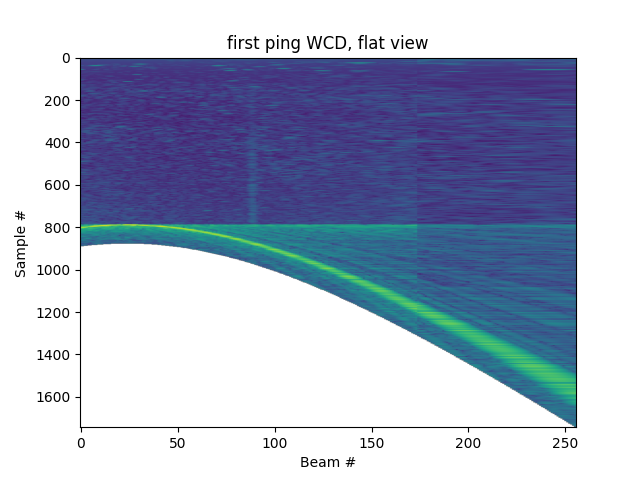

In [4]:
# example display
fig1,ax1 = pingmachine.pingprocessing.core.create_figure('WCD view 1') 
ax1.imshow(av.transpose(),aspect='auto') # we transpose the image for display purposes
ax1.set_xlabel('Beam #')
ax1.set_ylabel('Sample #')
ax1.set_title('first ping WCD, flat view')